# Problema

Implementación de la regresión lineal

## Instrucciones

Generar una implementación correcta de la regresión lineal usando el descenso del gradiente como método de optimización de los pesos y compararlo con la implementación directa de la librería sklearn (los valores de w y b no serán exactamente iguales pero muy similares)

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error


In [120]:
# Generación del dataset
np.random.seed(0)  # Para reproducibilidad
X = np.random.uniform(1, 10, 5000)  # Generar 5000 valores aleatorios para las horas de estudio
error = np.random.normal(0, 5, 5000)  # Generar errores aleatorios
y = 50 + 5 * X + error  # Generar la puntuación del examen

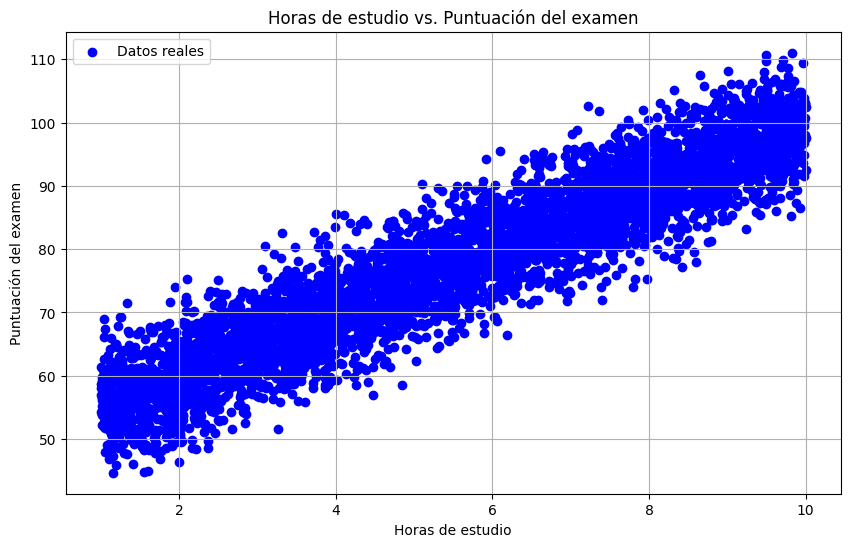

In [133]:
# Visualización de los datos
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [134]:
# Dividir los datos en conjuntos de entrenamiento, validación y prueba
# 80 % TRAIN Y VAL 20 % TEST

# Paso 1: Dividir en entrenamiento + validación (80%) y test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 2: Dividir la parte de entrenamiento + validación en entrenamiento (80%) y validación (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Convertir X_train, X_val y X_test en matrices de una sola columna
X_train = X_train.reshape(-1, 1)
X_val = X_val.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

print('Datos de Entrenamiento:', X_train.shape[0])
print('Datos de Validación:', X_val.shape[0])
print('Datos de Test:', X_test.shape[0])


Datos de Entrenamiento: 3200
Datos de Validación: 800
Datos de Test: 1000


## Implementación manual de la regresión con gradiente descendente

In [135]:
def cost_function(y_true, y_pred):
    """Calcula el error cuadrático medio (MSE)."""
    return np.mean((y_true - y_pred) ** 2)

def calculate_gradients(X, y_true, y_pred):
    """Calcula los gradientes de los pesos y el bias."""
    n_samples = len(y_true)
    error = y_pred - y_true
    grad_w = (2 / n_samples) * np.dot(X.T, error)
    grad_b = (2 / n_samples) * np.sum(error)
    return grad_w, grad_b

def update_parameters(w, b, grad_w, grad_b, lr):
    """Actualiza los parámetros (pesos y bias) usando el gradiente descendente."""
    w -= lr * grad_w
    b -= lr * grad_b
    return w, b

def train_regression(X_train, y_train, X_val, y_val, lr, epochs):
    """Entrena un modelo de regresión lineal utilizando descenso de gradiente."""
    
    # Inicialización de parámetros
    n_samples, n_features = X_train.shape
    w = np.random.randn(n_features)
    b = np.random.randn()

    train_loss_per_epoch = []
    val_loss_per_epoch = []

    for epoch in range(epochs):
        # Predicción en entrenamiento
        y_pred_train = np.dot(X_train, w) + b

        # Calcular la pérdida de entrenamiento
        train_loss = cost_function(y_train, y_pred_train)
        train_loss_per_epoch.append(train_loss)

        # Calcular los gradientes
        grad_w, grad_b = calculate_gradients(X_train, y_train, y_pred_train)

        # Actualizar los parámetros
        w, b = update_parameters(w, b, grad_w, grad_b, lr)

        # Predicción en validación
        y_pred_val = np.dot(X_val, w) + b

        # Calcular la pérdida de validación
        val_loss = cost_function(y_val, y_pred_val)
        val_loss_per_epoch.append(val_loss)

    return w, b, train_loss_per_epoch, val_loss_per_epoch

In [136]:
# Hiperparámetros
lr = 0.01
epochs = 1000

# Entrenar el modelo
w, b, train_loss_per_epoch, val_loss_per_epoch = train_regression(X_train, y_train, X_val, y_val, lr=lr, epochs=epochs)

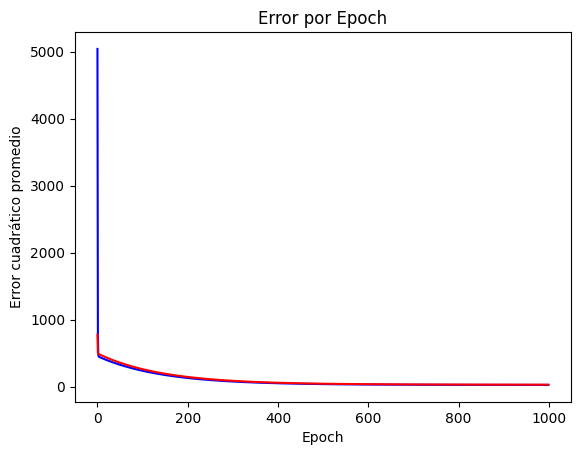

In [137]:
# Visualización del error de entrenamiento por epoch
plt.figure()
plt.plot(range(epochs), train_loss_per_epoch, '-b')
plt.plot(range(epochs), val_loss_per_epoch, '-r')
plt.xlabel('Epoch')
plt.ylabel('Error cuadrático promedio')
plt.title('Error por Epoch')
plt.show()

Costo del modelo: 25.889893365917064


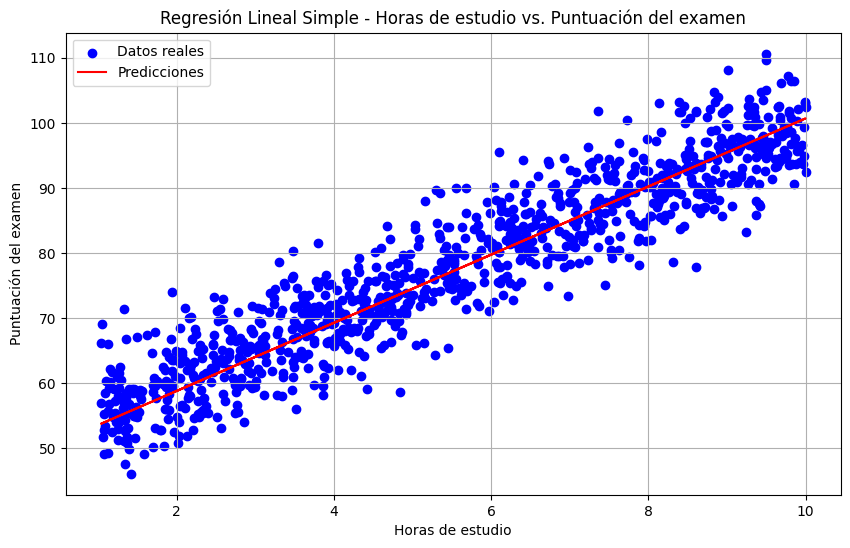

In [138]:
# Realizar predicciones en test
y_pred = np.dot(X_test, w) + b

# Calcular el costo
cost = cost_function(y_test, y_pred)

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()


In [139]:
# Calcular las métricas de evaluación mse, mae, r2 y mape
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test))

print("MSE en el conjunto de test:", mse)
print("MAE en el conjunto de test:", mae)
print("R^2 en el conjunto de test:", r2)
print("MAPE en el conjunto de test:", mape)


MSE en el conjunto de test: 25.889893365917064
MAE en el conjunto de test: 4.007706418504842
R^2 en el conjunto de test: 0.8701092132448653
MAPE en el conjunto de test: 0.05307233200192738


## Implementación de la regresión lineal usando sklearn

In [140]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Costo del modelo: 25.252964425596577


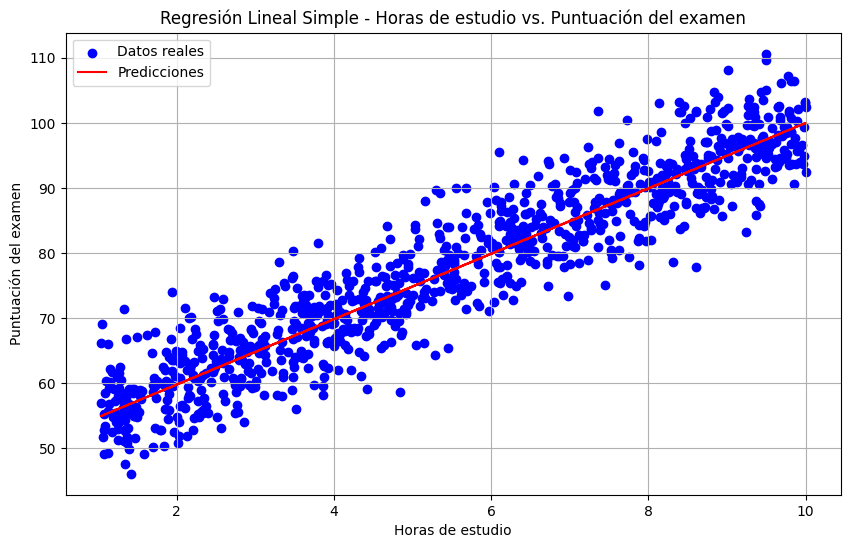

In [141]:
# Realizar predicciones en test
y_pred = model.predict(X_test)

# Calcular el costo
cost = mean_squared_error(y_test, y_pred)

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [142]:
# Calcular las métricas de evaluación mse, mae, r2 y mape
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test))

print("MSE en el conjunto de entrenamiento:", mse)
print("MAE en el conjunto de entrenamiento:", mae)
print("R^2 en el conjunto de entrenamiento:", r2)
print("MAPE en el conjunto de entrenamiento:", mape)

MSE en el conjunto de entrenamiento: 25.252964425596577
MAE en el conjunto de entrenamiento: 3.9549055944714526
R^2 en el conjunto de entrenamiento: 0.8733047150569452
MAPE en el conjunto de entrenamiento: 0.052580324017615095


## Comparación de parámetros obtenidos

In [143]:
b_sklearn = model.intercept_
w_sklearn = model.coef_[0]

print("Coeficiente de intercepción (b) - Manual:", b)
print("Coeficiente de pendiente (w) - Manual:", w)
print("Coeficiente de intercepción (b) - Scikit-learn:", b_sklearn)
print("Coeficiente de pendiente (w) - Scikit-learn:", w_sklearn)

Coeficiente de intercepción (b) - Manual: 48.340152797327235
Coeficiente de pendiente (w) - Manual: [5.23553984]
Coeficiente de intercepción (b) - Scikit-learn: 49.74091638410561
Coeficiente de pendiente (w) - Scikit-learn: 5.024644665080551
